<a href="https://colab.research.google.com/github/alexsander020/Exercicios-de-IA/blob/main/Para_Melhorar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import time
import csv
import numpy as np
import serial 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score

In [ ]:
#1°
porta = "/dev/tty"
bund = 9600
arduino = "logger.csv"

ser = serial.Serial(porta,bund)
ser.flushinput()
print("Abrindo Serial")

amostra = 10 
linha = 0

while linha <= 0:

  data = str(ser.readline().decode("utf-8"))
  print(data)

  file = open(arquivo,"a")
  file.write(data)
  linha +=1

print("Final das Leituras")

file.close()

ser.close()

In [ ]:
#2°
csv = pd.read_csv("test.csv")

excelWriter = pd.ExecelWriter("new.xlsx")

csv.to_excel(exceWriter, 
             index_label = 'ABC' 
             idex = False,float_format = "%.2f",
             #header - False,
             freeze_penes = (3, 1),
             sheet_name = "my data from csv"
             )

In [ ]:
#3°
base = pd.read_excel("test.xlsx")

base.head()

plt.scatter(base["tempo"], base["humidade"])
plt.show()

In [ ]:
data = pd.read_csv("Crop_recommendation.csv")
print(data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [ ]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
enc = LabelEncoder()
data.label = enc.fit_transform(data.label)

In [ ]:
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
5,69,37,42,23.058049,83.370118,7.073454,251.055000,20
6,69,55,38,22.708838,82.639414,5.700806,271.324860,20
7,94,53,40,20.277744,82.894086,5.718627,241.974195,20
8,89,54,38,24.515881,83.535216,6.685346,230.446236,20
9,68,58,38,23.223974,83.033227,6.336254,221.209196,20


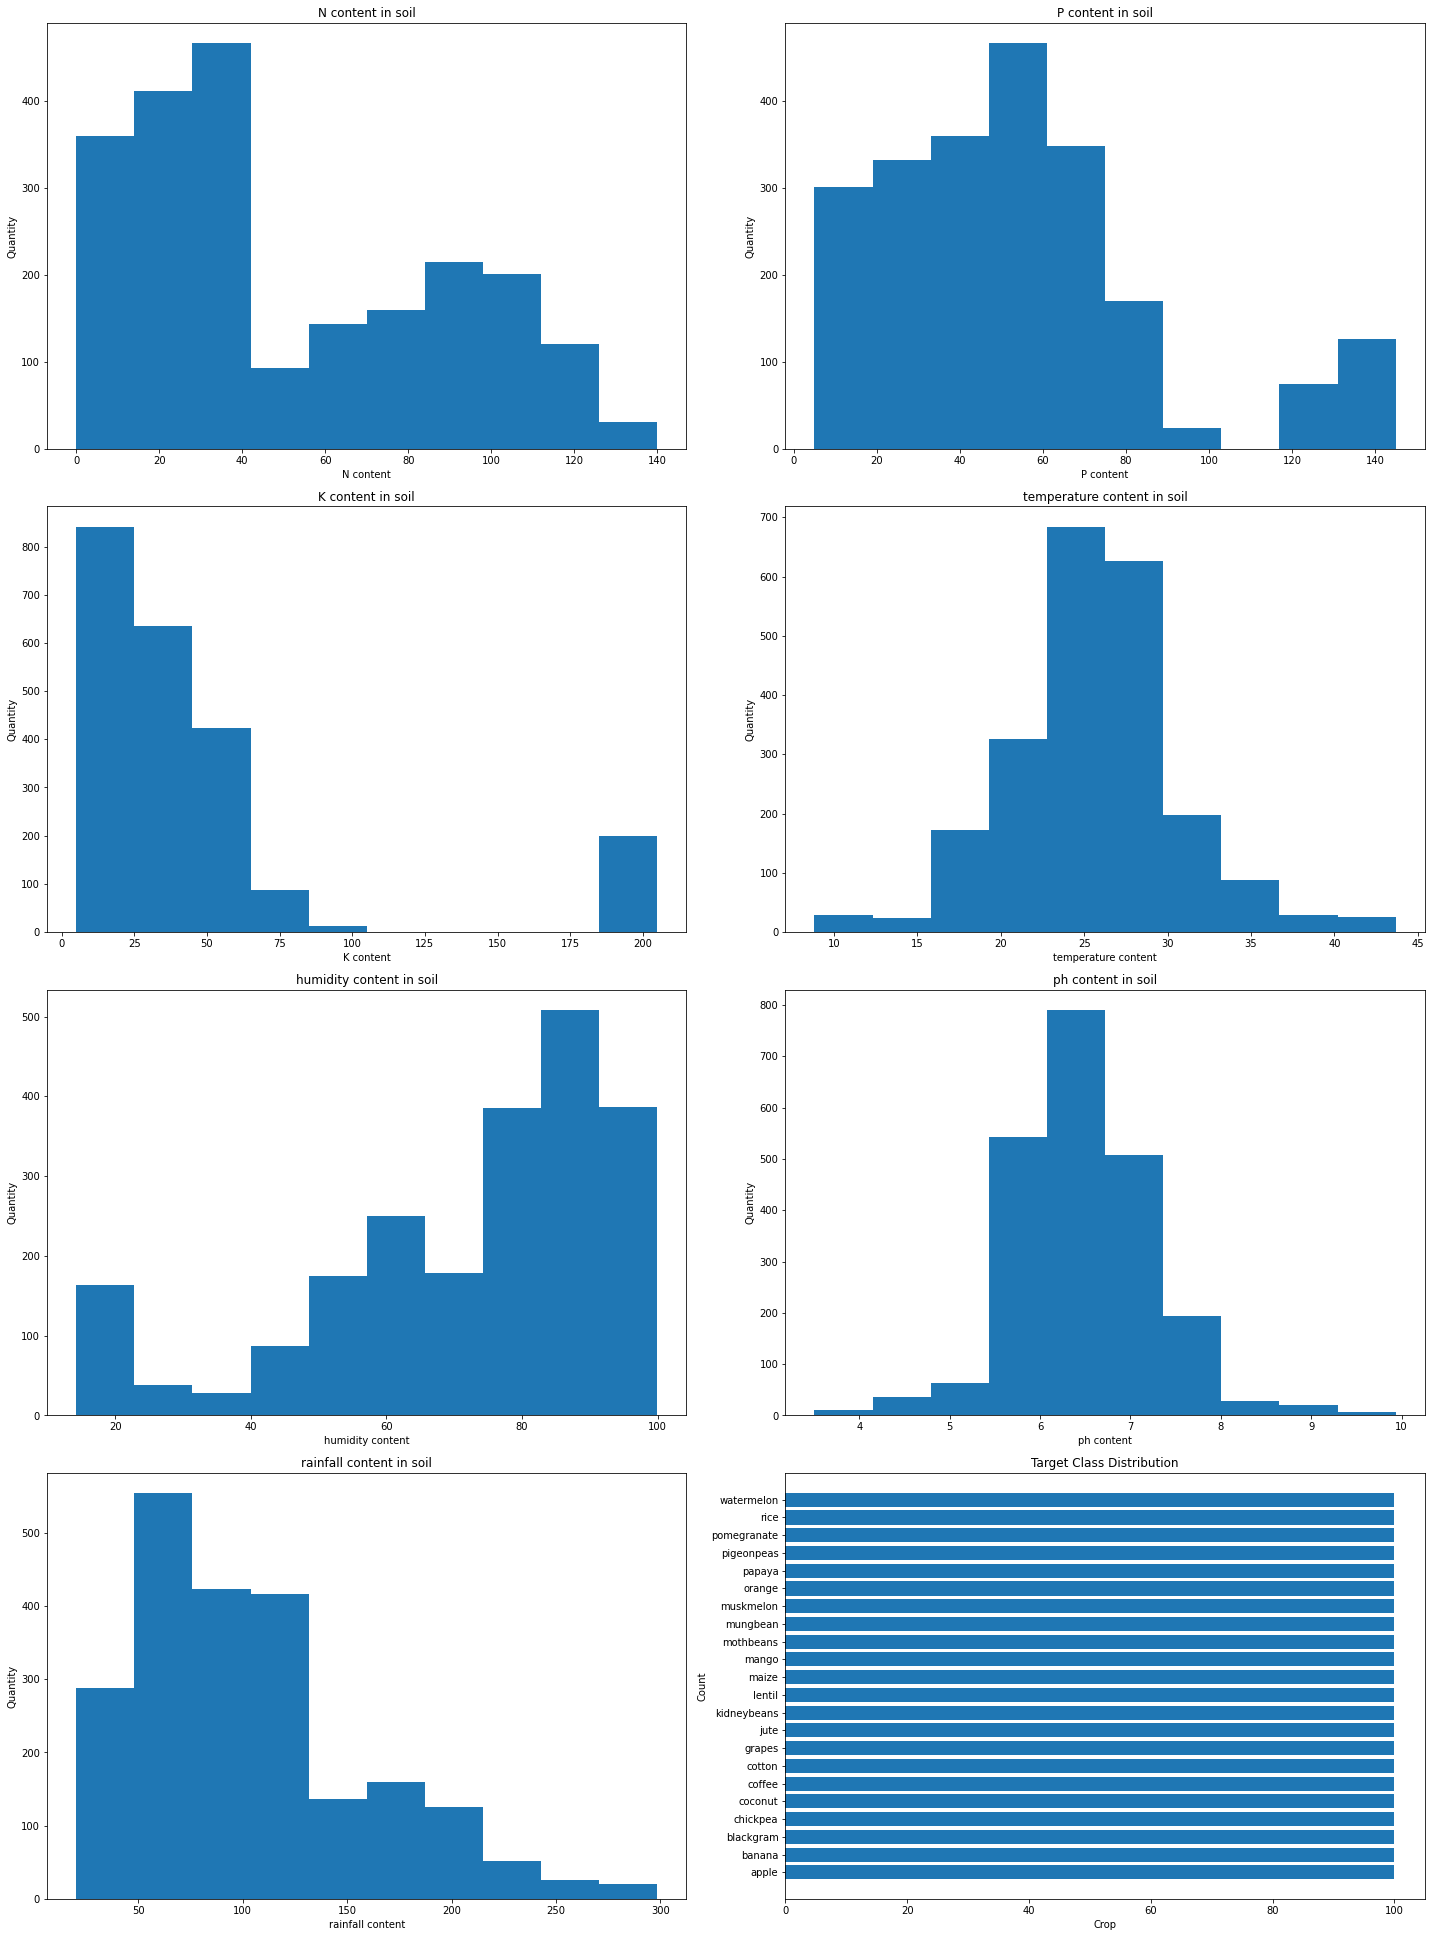

In [ ]:
plt.figure(figsize=(20,40))
pos = 1
for i in data.columns:
    plt.subplot(6,2,pos)
    if i == "label":
        un, count = np.unique(data.label,return_counts=True)
        plt.xlabel("Crop")
        plt.ylabel("Count")
        plt.title("Target Class Distribution")
        plt.barh([enc.classes_[i] for i in un], count)
    else:
        plt.title(i + " content in soil")
        plt.xlabel(i + " content")
        plt.ylabel("Quantity")
        plt.hist(data[i])
    pos=pos+1
plt.tight_layout()

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels = oversample.fit_resample(data.drop(["label"],axis=1), data.label)

In [ ]:
treinoN = data.sample(int(len(data)*0.2))

X_treinoN = treinoN[['temperature',	'humidity',	'ph',	'rainfall', 'label']]
y_treinoN = treinoN[['N']]

testeN = data[~data.index.isin(treinoN.index)]

X_testeN = testeN[['temperature',	'humidity',	'ph',	'rainfall',	'label']]
y_testeN = testeN[["N"]]
#____________________________________________________________________________________
treinoP = data.sample(int(len(data)*0.2))

X_treinoP = treinoP [['temperature',	'humidity',	'ph',	'rainfall', 'label']]
y_treinoP = treinoP [["P"]]

testeP = data[~data.index.isin(treinoP .index)]

X_testeP = testeP [['temperature',	'humidity',	'ph',	'rainfall',	'label']]
y_testeP = testeP [["P"]]
#____________________________________________________________________________________
treinoK = data.sample(int(len(data)*0.2))

X_treinoK = treinoK [['temperature',	'humidity',	'ph',	'rainfall', 'label']]
y_treinoK = treinoK [["K"]]

testeK = data[~data.index.isin(treinoK.index)]

X_testeK = testeK [['temperature',	'humidity',	'ph',	'rainfall',	'label']]
y_testeK = testeK [["K"]] 

In [ ]:
#train_x, test_x, train_y, test_y = train_test_split(features,
                                                    #labels,
                                                    #test_size=0.2, 
                                                    #shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfN = RandomForestRegressor(n_estimators=15,random_state=0)
rfN.fit(X_treinoN, y_treinoN)
#---------------------------------------------------------
rfP = RandomForestRegressor(n_estimators=15,random_state=0)
rfP.fit(X_treinoP, y_treinoP)
#---------------------------------------------------------
rfK = RandomForestRegressor(n_estimators=15,random_state=0)
rfK.fit(X_treinoK, y_treinoK)
#mse r2 mae

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(n_estimators=15, random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error
predP = rfP.predict(X_testeP)
mean_squared_error(predP,y_testeP)
#------------------------------------
predK = rfK.predict(X_testeK)
mean_squared_error(predK,y_testeK)
#------------------------------------
predN = rfP.predict(X_testeN)
mean_squared_error(predN,y_testeN)

2823.5127626262624

In [ ]:
from sklearn.metrics import mean_absolute_error
y_trueP = rfP.predict(X_testeP)
mean_absolute_error(y_trueP, y_testeP)
#--------------------------------------
y_trueN = rfN.predict(X_testeN)
mean_absolute_error(y_trueN, y_testeN)
#--------------------------------------
y_trueK = rfK.predict(X_testeK)
mean_absolute_error(y_trueK, y_testeK)

4.900265151515152

In [ ]:
from sklearn.metrics import r2_score
predP2 = rfP.predict (X_testeP)
r2_score(y_testeP, predP2)
#-------------------------------
predK2 = rfK.predict (X_testeK)
r2_score(y_testeK, predK2)
#-------------------------------
predN2 = rfN.predict (X_testeN)
r2_score(y_testeN, predN2)


0.8599377036345305

In [ ]:
from sklearn.linear_model import LinearRegression
lrP =  LinearRegression()
lrP.fit(X_treinoP, y_treinoP)
#-------------------------------------------------
lrK =  LinearRegression()
lrK.fit(X_treinoK, y_treinoK)
#-------------------------------------------------
lrN =  LinearRegression()
lrN.fit(X_treinoN, y_treinoN)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
predYP = lrP.predict(X_testeP)
xP = mean_squared_error(predYP,y_testeP)

predYN = lrP.predict(X_testeN)
xN = mean_squared_error(predYN,y_testeN)

predYK = lrK.predict(X_testeK)
xK = mean_squared_error(predYK,y_testeK)
#----------------------------------------------
from sklearn.metrics import mean_absolute_error
y_trueP = lrP.predict(X_testeP)
yP = mean_absolute_error(y_trueP, y_testeP)

y_trueN = lrN.predict(X_testeN)
yN = mean_absolute_error(y_trueN, y_testeN)

y_trueK = lrK.predict(X_testeK)
yK = mean_absolute_error(y_trueK, y_testeK)
#----------------------------------------------
from sklearn.metrics import r2_score
predY2P = lrP.predict (X_testeP)
zP = r2_score(y_testeP, predY2P)

predY2N = lrN.predict (X_testeN)
zN = r2_score(y_testeN, predY2N)

predY2K = lrK.predict (X_testeK)
zK = r2_score(y_testeK, predY2K)

print("Medidas do nutriente P: "f"{xP}, {yP}, {zP}\n")

print("Medidas do nutriente N: "f"{xN}, {yN}, {zN}\n")

print("Medidas do nutriente K: "f"{xK}, {yK}, {zK}")

Medidas do nutriente P: 805.2189794370166, 21.4469285284, 0.26530429350446394

Medidas do nutriente N: 1647.8029204241793, 31.23070003860113, 0.041033290274664624

Medidas do nutriente K: 1881.1370040085328, 33.12244627757796, 0.24938416444813316


In [ ]:
def previcaoN(temperature, humidity, ph, rainfall, label):
  x = [temperature, humidity, ph, rainfall, label]
  x = np.array(x)
  x = x.reshape([1,5])
  predY = rfN.predict(x)
  return predY
#---------------------------------------------------------------
def previcaoP(temperature, humidity, ph, rainfall, label):
  x = [temperature, humidity, ph, rainfall, label]
  x = np.array(x)
  x = x.reshape([1,5])
  predY = rfP.predict(x)
  return predY
#---------------------------------------------------------------
def previcaok(temperature, humidity, ph, rainfall, label):
  x = [temperature, humidity, ph, rainfall, label]
  x = np.array(x)
  x = x.reshape([1,5])
  predY = rfK.predict(x)
  return predY


In [ ]:
xP = ['temperature', 'humidity'	, 'ph', 'rainfall', 'label']
print(xP)
xP = np.array(xP)
xP = xP.reshape([1,5])
xP.shape
#----------------------
xN = ['temperature', 'humidity'	, 'ph', 'rainfall', 'label']
print(xN)
xN = np.array(xN)
xN = xN.reshape([1,5])
xN.shape
#----------------------
xK = ['temperature', 'humidity'	, 'ph', 'rainfall', 'label']
print(xK)
xK = np.array(xK)
xK = xK.reshape([1,5])
xK.shape

['temperature', 'humidity', 'ph', 'rainfall', 'label']
['temperature', 'humidity', 'ph', 'rainfall', 'label']
['temperature', 'humidity', 'ph', 'rainfall', 'label']


(1, 5)

In [ ]:
print('''|          Menu de Cultura       |
Rice ---> Arroz (1 - 101)
Maize ---> Milho (102 - 201)
Chickpea ---> Grão de Bico (202 - 300)
Kidneyebeans ---> Feijão roxo (301 - 400)
Pigeon peas ---> Guandu (401 - 499)
Moth beans ---> Vigna aconitifolia (500 - 600)
Mung bean ---> Vigna radiata (feijão mungu)(601 - 700)
Black gram ---> Vigna mungo (701 - 801)
Lentil ---> Lentilha (802 - 901)
Pomegranate ---> Romã (901 - 1001)
Banana ---> Banana (1002 - 1101)
Mango ---> Manga (1102 - 1200)
Grapes ---> Uva (1201 - 1301)
Watermelon ---> Melancia (1302 - 1401)
Muskmelon ---> Melão (1402 - 1501)
Apple ---> Maçã (1502 - 1601)
Orange ---> Laranja (1602 - 1701)
Papaya ---> Mamão (1702 - 1801)
Coconut ---> Coco (1802 - 1901)
Cotton ---> Algodão (1902 - 2001)
Jute ---> Fibra de juta (2002 - 2101)
Coffee ---> Café (2102 - 2201)
-------------------------------------------------''')
temperature	= int(input("Digido o Valor da Temperatura : "))

humidity = int(input("Digido o Valor da Humidade : "))

ph = int(input("Digido o Valor da PH : "))

rainfall =	int(input("Digido o Valor da Chuva : "))

label = int(input("Digido o Valor da  Cultura: "))

N = previcaoN(temperature, humidity, ph, rainfall, label)

P = previcaoP(temperature, humidity, ph, rainfall, label)

K = previcaok(temperature, humidity, ph, rainfall, label)

saida = f' Com os valores passados da \n Temperature :  {temperature} \n da Humidade :  {humidity}\n do PH : {ph} \n da Chuva : {rainfall} \n da Cultura: {label}'

saida2 = f'Foi obitido os Valoros dos Seguintses Nutrientes \n Nitrogênio (N):  {N}\n Valor do Fósforo (P): {P} \n Valor do Potássio (K): {K}'

print(saida)

print(saida2)


|          Menu de Cultura       |
Rice ---> Arroz (1 - 101)
Maize ---> Milho (102 - 201)
Chickpea ---> Grão de Bico (202 - 300)
Kidneyebeans ---> Feijão roxo (301 - 400)
Pigeon peas ---> Guandu (401 - 499)
Moth beans ---> Vigna aconitifolia (500 - 600)
Mung bean ---> Vigna radiata (feijão mungu)(601 - 700)
Black gram ---> Vigna mungo (701 - 801)
Lentil ---> Lentilha (802 - 901)
Pomegranate ---> Romã (901 - 1001)
Banana ---> Banana (1002 - 1101)
Mango ---> Manga (1102 - 1200)
Grapes ---> Uva (1201 - 1301)
Watermelon ---> Melancia (1302 - 1401)
Muskmelon ---> Melão (1402 - 1501)
Apple ---> Maçã (1502 - 1601)
Orange ---> Laranja (1602 - 1701)
Papaya ---> Mamão (1702 - 1801)
Coconut ---> Coco (1802 - 1901)
Cotton ---> Algodão (1902 - 2001)
Jute ---> Fibra de juta (2002 - 2101)
Coffee ---> Café (2102 - 2201)
-------------------------------------------------
Digido o Valor da Temperatura : 21
Digido o Valor da Humidade : 457554
Digido o Valor da PH : 6
Digido o Valor da Chuva : 85
Digido o 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print("Train MSE : {:.2f} ".format (mean_squared_error(rfP.predict(X_treinoP), y_treinoP)))

Train MSE : 23.00 


In [ ]:
print("Train MAE : {:.2f} ".format (mean_absolute_error(rfP.predict(X_treinoP), y_treinoP)))


Train MAE : 3.41 


In [ ]:
def N(x,c,d,f,):
  return rfN.predict(x,c,d,f,)

def P(x,c,d,f,):
  return rfP.predict(x,c,d,f,)

def K(x,c,d,f,):
  return rfK.predict(x,c,d,f,)

Salvando Modelo






In [ ]:
import joblib
from sklearn.utils.validation import joblib

In [ ]:
joblib.dump(rfK,'rfK')

['rfK']

In [ ]:
joblib.dump(rfN,'rfN')

['rfN']

In [ ]:
joblib.dump(rfP,'rfP')

['rfP']